
# Analyse des Verhaltens von Benutzern nach Zeiträumen

Das Verhalten von Benutzern wird nachfolgend im Kontext verschiedener Zeiträume betrachtet.

**Zeitraum der aufgezeichneten Log-Einträge**
Mo, 12.10.2020 bis Do, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

**Ergebnis**
Die Benutzeraktivitäten orientierten sich an der normalen Arbeitswoche, etwa drei Viertel aller Interaktionen wurde im Zeitraum von Montag bis Freitag verzeichnet.
Insgesamt etwa die Hälfte aller Aktivitäten wurden im Zeitraum von 10 bis 18 Uhr registriert.

### Import von Bibliotheken und anderen Erweiterungen

In [22]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [23]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [24]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [25]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [26]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [27]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Ausgabe der Mengen an unterschiedlichen Werten pro Tabellenmerkmal

In [28]:
attributes = moodle_data.nunique()
display(attributes)

courseid                 579
Studiengang                5
userid                   142
relateduserid            145
action                    42
eventname                228
objecttable               69
objectid              172056
timecreated           383508
course_module_type        29
instanceid              4372
dtype: int64

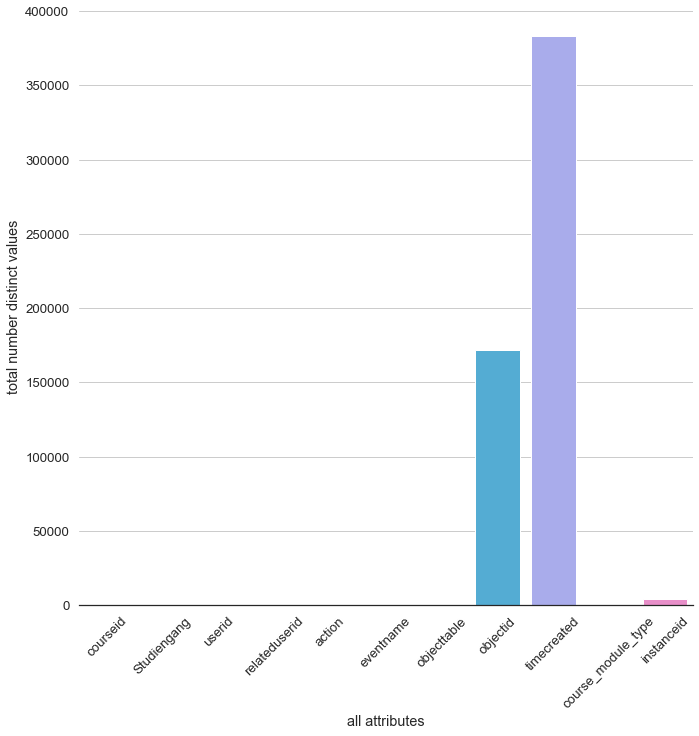

In [29]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal
result = attributes
# Visualisierung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro Studiengang

In [30]:
studies = moodle_data.Studiengang.groupby(moodle_data.Studiengang).count()
display(studies)

Studiengang
0    470202
1    174327
2     73037
3    103518
4     79057
Name: Studiengang, dtype: int64

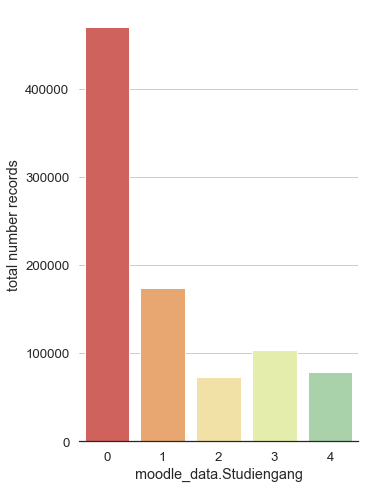

In [31]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(studies.count(), 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Mengen an Log-Einträgen pro Studiengang
result = studies
# Visualisierung der Mengen an Log-Einträgen pro Studiengang
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.Studiengang')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen nach Tagesstunden

In [32]:
# Ausgabe der Tagesstunden der protokollierten Log-Einträge
hours_per_day = moodle_data.timecreated.dt.hour.sort_values()
display(hours_per_day)

461530     0
394863     0
394862     0
535737     0
535738     0
          ..
220345    23
420721    23
420720    23
324596    23
647922    23
Name: timecreated, Length: 900141, dtype: int64

&nbsp;
**Visualisierung der Mengen an Log-Einträgen pro Tagesstunde**
Die Benutzeraktivitäten orientierten sich an den normalen Arbeitsstunden, etwa die Hälfte aller Interaktionen wurde im Zeitraum von 10 bis 18 Uhr verzeichnet.
Vor 7 Uhr wurden vergleichsweise nur wenig Aktivitäten verzeichnet. Ab 19 Uhr nahm die Menge an protokollierten Interaktionen überraschenderweise deutlich ab.

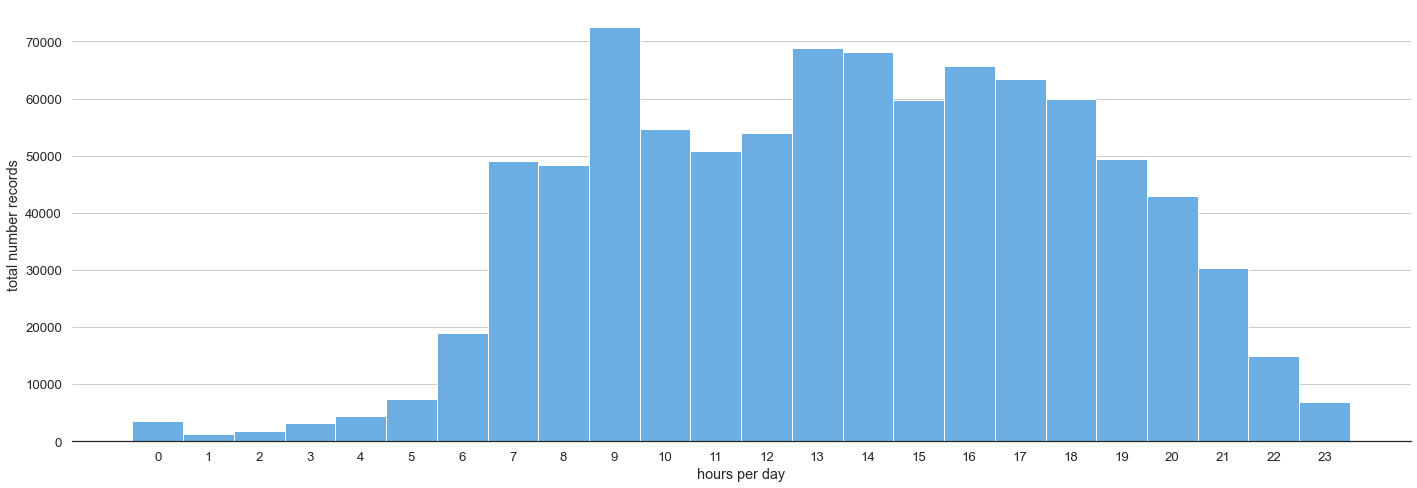

In [33]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Mengen an Log-Einträgen pro Tagesstunde
chart = sns.histplot(hours_per_day, bins=24, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Mengen an Log-Einträgen pro Tagesstunde und Studiengang**
Bis 10 Uhr wurden verhältnismäßig mehr Interaktionen im übergeordneten Studiengang 0 verzeichnet, ebenso über die Mittagszeit (13 bis 15 Uhr). Dies könnte auf ein höheres Kommunikationsvolumen hindeuten.
Von 10 bis 13 Uhr und noch deutlicher ab 15 Uhr stiegen die Interaktionen in den anderen Kursen an bzw. blieben zumindest konstant. Dies könnte für eine stärkere Nutzung der Lehrmaterialien sprechen.

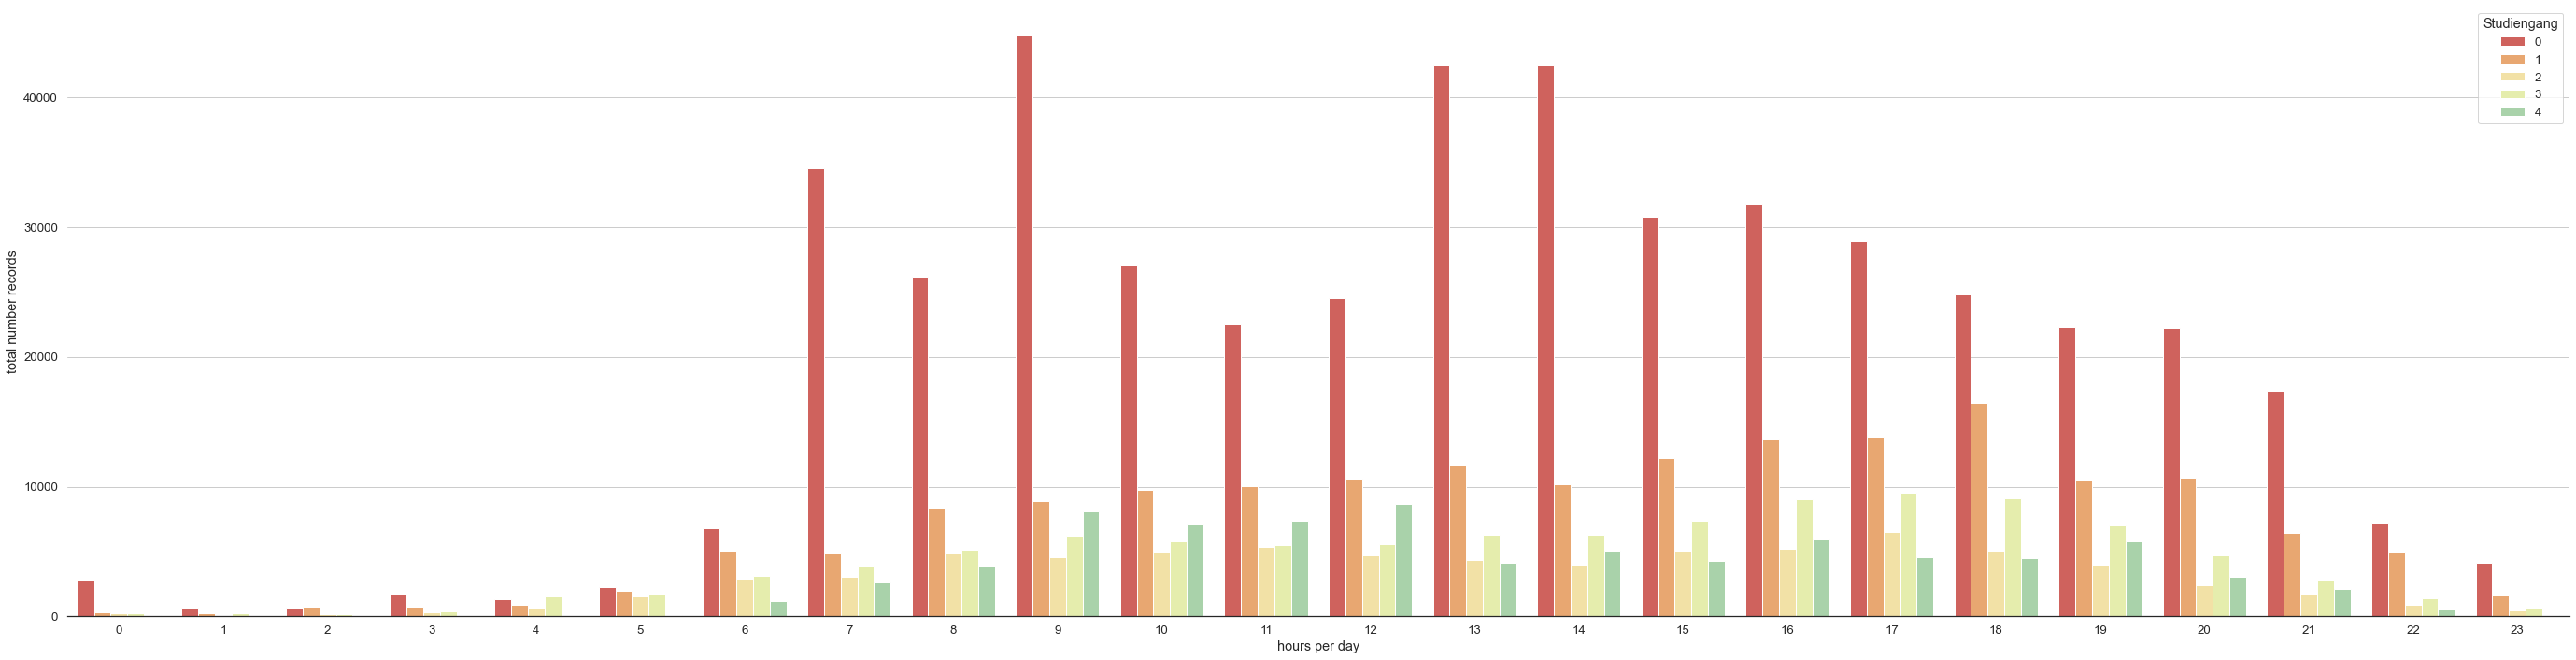

In [34]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(48, 12)) # Größe der Visualisierung (in inch)

# Visualisierung der Mengen an Log-Einträgen pro Tagesstunde und Studiengang
chart = sns.countplot(x=hours_per_day, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen an Log-Einträgen über alle Tagesstunden**

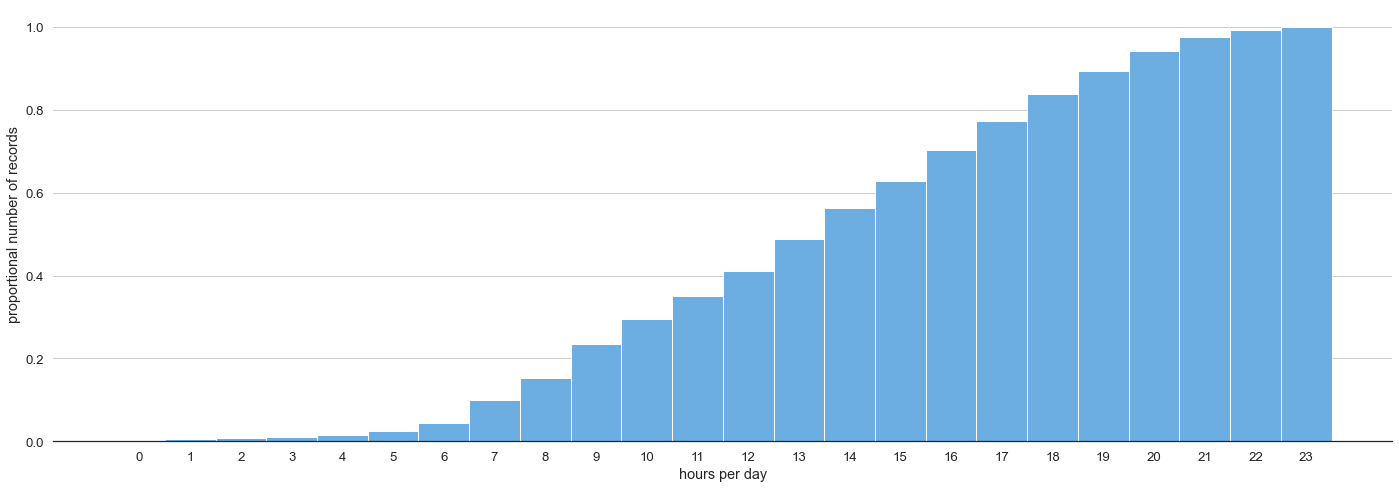

In [35]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der kumulierten Mengen an Log-Einträgen über alle Tagesstunden
chart = sns.histplot(hours_per_day, bins=24, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Mengen an Log-Einträgen pro Studiengang über alle Tagesstunden**

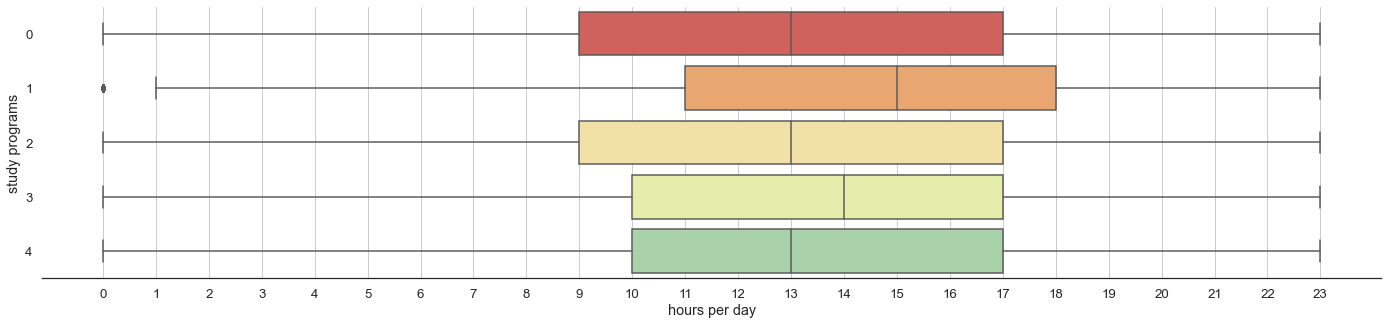

In [36]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, studies.count()))  # Größe der Visualisierung (in inch)

# Visualisierung der Mengen an Log-Einträgen pro Studiengang über alle Wochentage
chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen nach Wochentagen

In [37]:
# Ausgabe der Wochentage der protokollierten Log-Einträge
days_per_week = moodle_data.timecreated.dt.weekday.sort_values()
display(days_per_week)

0         0
262704    0
262705    0
262706    0
262707    0
         ..
96814     6
96815     6
96816     6
96808     6
450974    6
Name: timecreated, Length: 900141, dtype: int64

&nbsp;
**Visualisierung der Mengen an Log-Einträgen pro Wochentag**
Die Benutzeraktivitäten orientierten sich an der normalen Arbeitswoche, etwa drei Viertel aller Interaktionen wurde im Zeitraum von Montag bis Freitag verzeichnet.
An den Wochenenden wurden dagegen nur vergleichsweise wenig Aktivitäten verzeichnet.

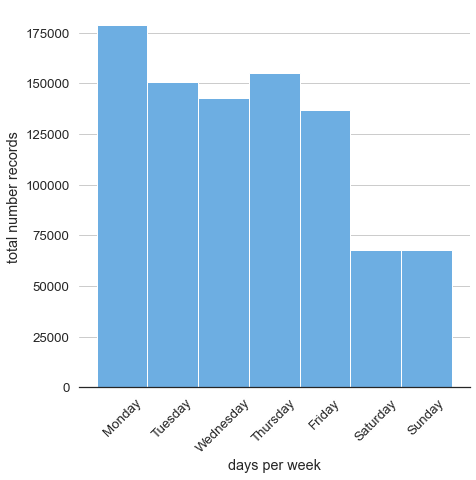

In [38]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Beschriftungen auf der X-Achse

# Visualisierung der Mengen an Log-Einträgen pro Wochentag
chart = sns.histplot(days_per_week, bins=7, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Mengen an Log-Einträgen pro Wochentag und Studiengang**
Der Rückgang der unter der Woche vergleichsweise hohen Mengen an Interaktionen im Studiengang 0 fällt deutlich stärker aus, als der Rückgang der Aktivitäten in den anderen Kursen.
Auch dies könnte auf ein verändertes Kommunikationsverhalten an Arbeitstagen und an Wochenenden hindeuten. In jedem Fall beeinflusst der Rückgang im Studiengang 0 das Gesamtergebnis deutlich.

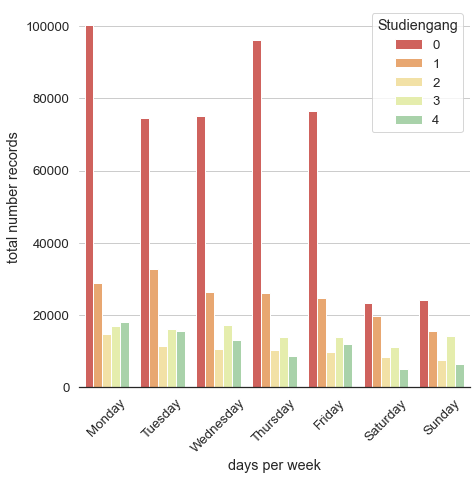

In [39]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Beschriftungen auf der X-Achse

# Visualisierung der Mengen an Log-Einträgen pro Wochentag und Studiengang
chart = sns.countplot(x=days_per_week, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'])

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen an Log-Einträgen über alle Wochentage**

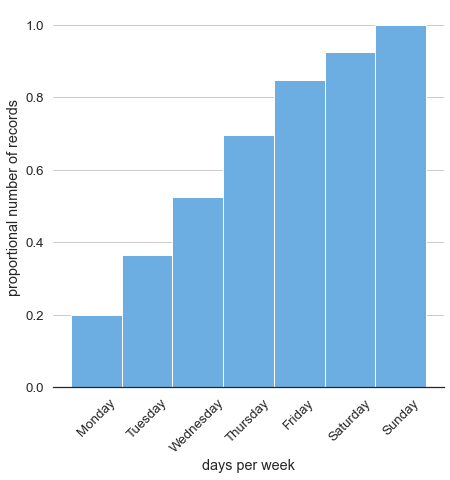

In [40]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der kumulierten Mengen an Log-Einträgen über alle Wochentage
chart = sns.histplot(days_per_week, bins=7, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Mengen an Log-Einträgen pro Studiengang über alle Wochentage**

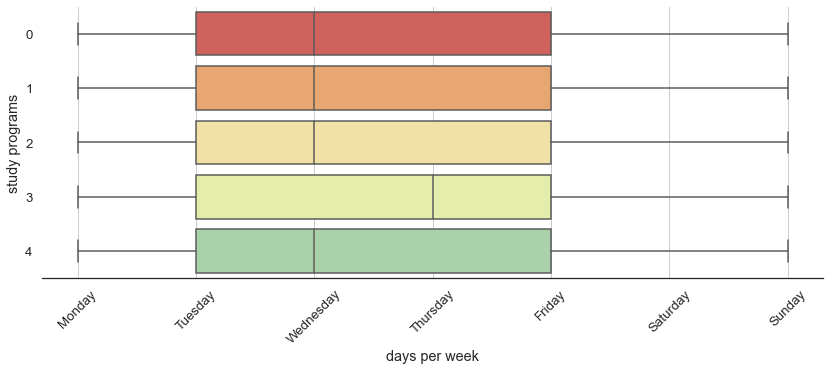

In [41]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, studies.count()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Mengen an Log-Einträgen pro Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()